# Mart Sales Prediction

You are provided with historical sales data for 45  stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, mart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday
weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.



In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv("C:\\Users\\DINESH KUMAR\\Downloads\\sales_data_set.csv")
df2 = pd.read_csv("C:\\Users\\DINESH KUMAR\\Downloads\\Features_data_set.csv")
df3 = pd.read_csv("C:\\Users\\DINESH KUMAR\\Downloads\\stores_data_set.csv")

print(df1.head(3))

print('\n')
print(df2.head(3))
print('\n')
print(df3.head(3))

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False


   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  


   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392


In [6]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(421570, 5)
(8190, 12)
(45, 3)


In [7]:
# here iam merging all datasets into single data

In [8]:
df = df1.merge(df2, how = 'left').merge(df3, how = 'left')
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [10]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

<Axes: >

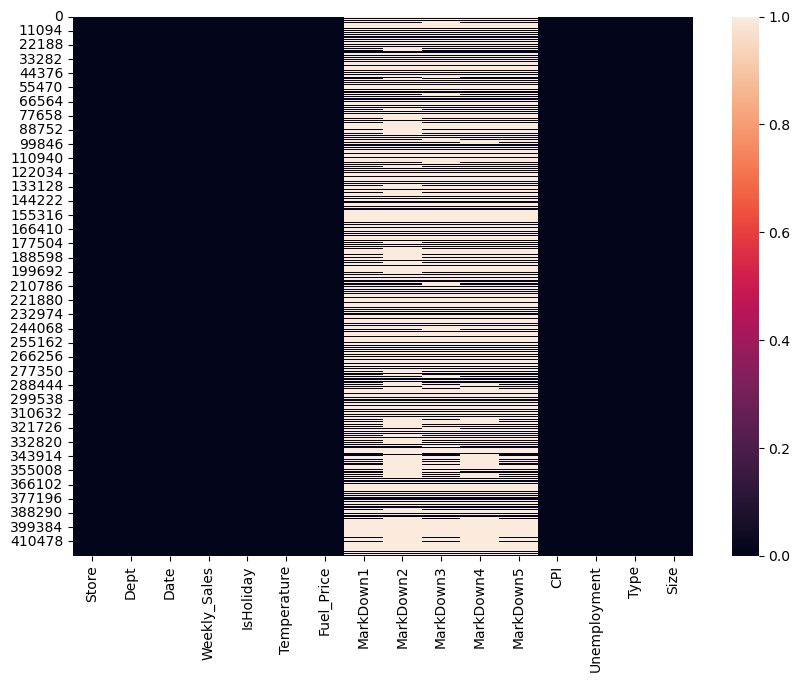

In [11]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(df.isna())

## single variable analysis

In [12]:
df['Store'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Store, dtype: int64

In [13]:
df['Store'].value_counts(ascending = False)

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

<Figure size 1200x600 with 0 Axes>

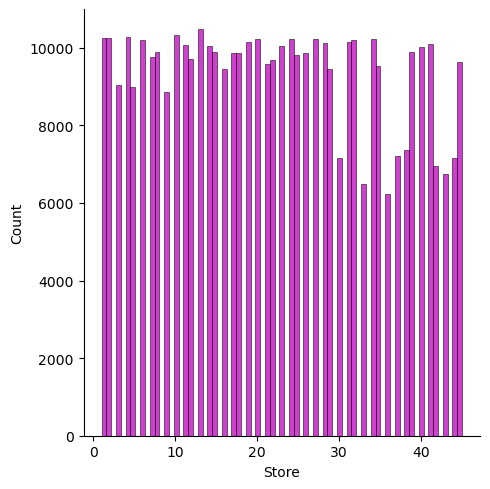

In [19]:
plt.figure(figsize= (12,6))
sns.displot(df['Store'],color = 'm')
plt.show()

## dept

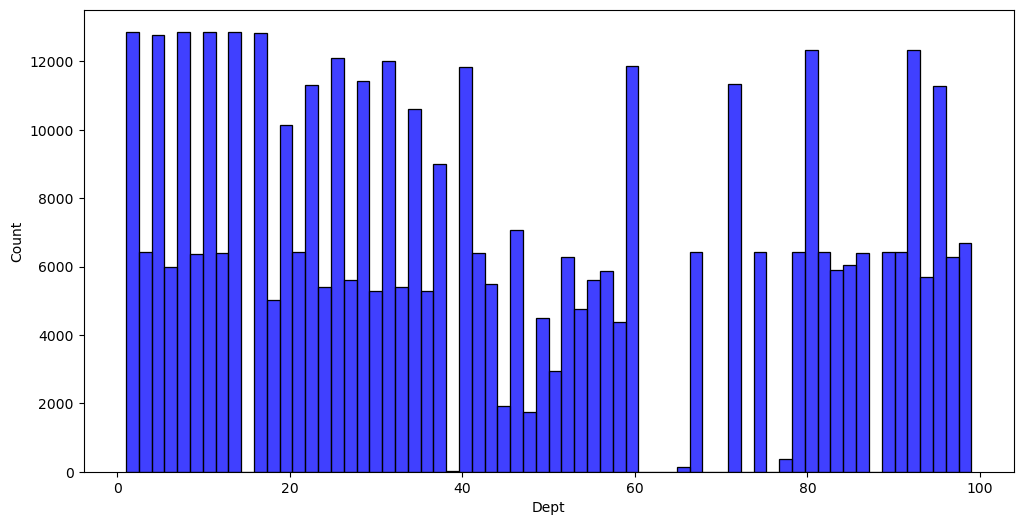

In [24]:
plt.figure(figsize= (12,6))
sns.histplot(df['Dept'],color = 'b')
plt.show()

In [22]:
df['Dept'].value_counts()

1     6435
10    6435
38    6435
21    6435
67    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

In [23]:
df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

## weekly sales

In [27]:
df['Weekly_Sales'][:10]

0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
5    21043.39
6    22136.64
7    26229.21
8    57258.43
9    42960.91
Name: Weekly_Sales, dtype: float64

C:\Users\DINESH KUMAR\AppData\Local\Temp\ipykernel_7568\799265931.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weekly_Sales'])


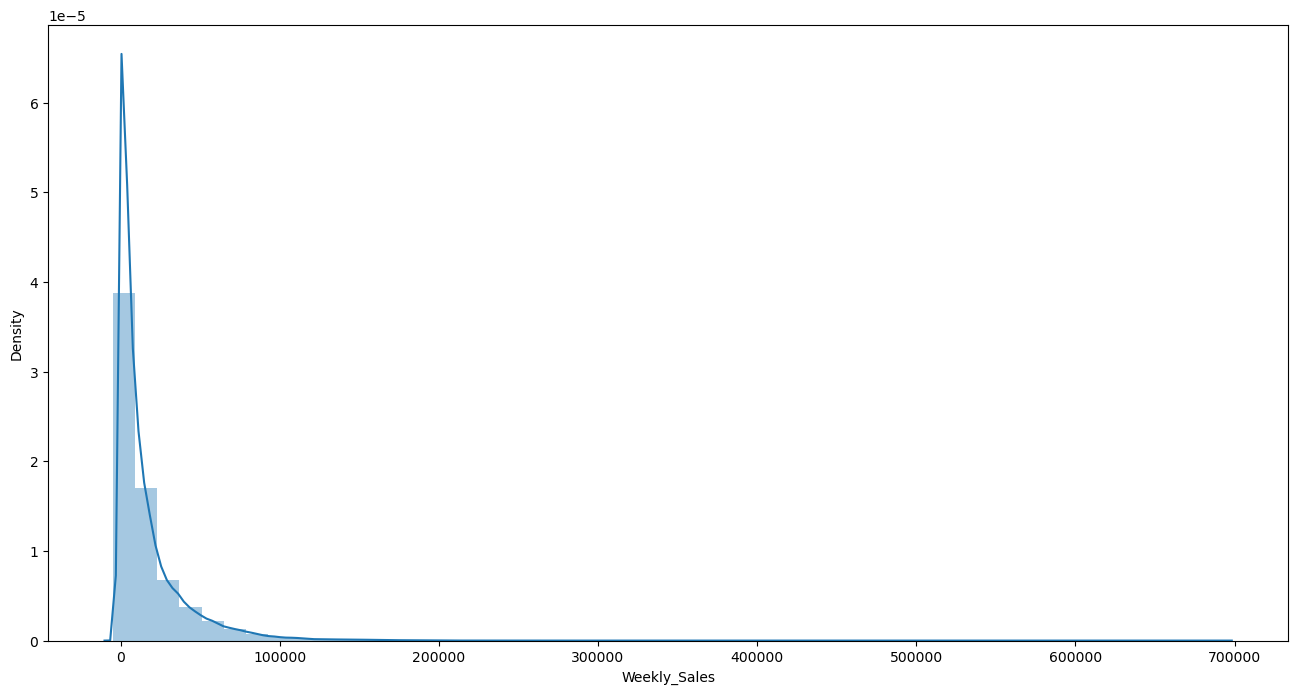

In [26]:
plt.figure(figsize= (16,8))
sns.distplot(df['Weekly_Sales'])
plt.show()

## IsHoliday

In [27]:
df['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [28]:
df['IsHoliday'].value_counts(normalize=True)

False    0.929642
True     0.070358
Name: IsHoliday, dtype: float64

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


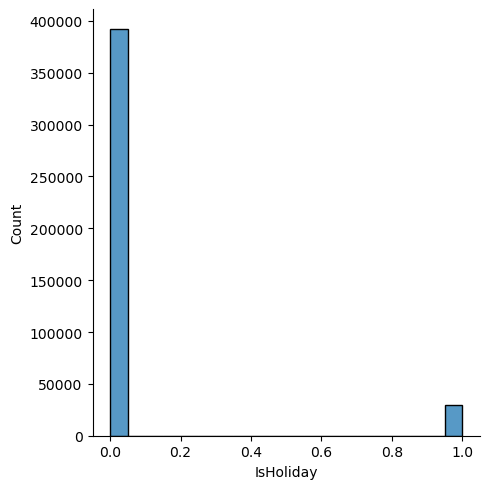

In [31]:
sns.displot(df['IsHoliday'])
plt.show()

## Temprature

In [39]:
df['Temperature'][:10]

0    42.31
1    38.51
2    39.93
3    46.63
4    46.50
5    57.79
6    54.58
7    51.45
8    62.27
9    65.86
Name: Temperature, dtype: float64

C:\Users\DINESH KUMAR\AppData\Local\Temp\ipykernel_7568\1289491373.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'],color='r')


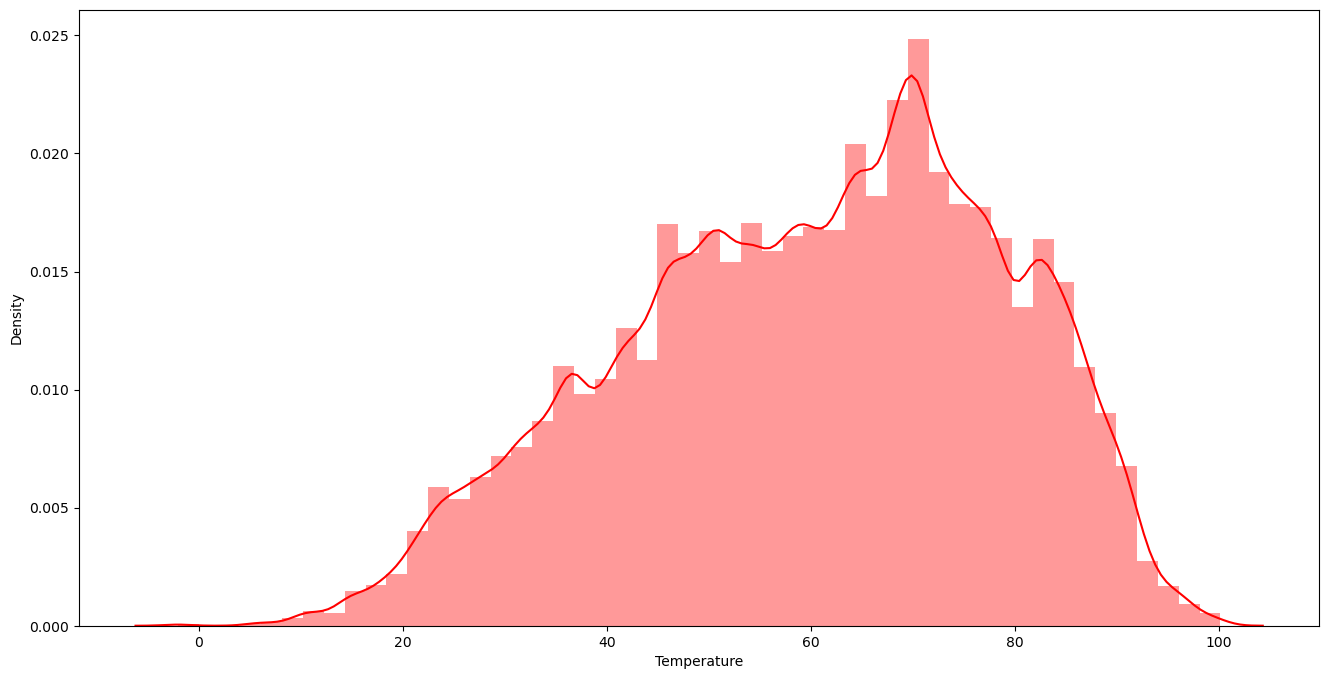

In [32]:
plt.figure(figsize= (16,8))
sns.distplot(df['Temperature'],color='r')
plt.show()

## Fuel Price

In [33]:
df['Fuel_Price'][:10]

0    2.572
1    2.548
2    2.514
3    2.561
4    2.625
5    2.667
6    2.720
7    2.732
8    2.719
9    2.770
Name: Fuel_Price, dtype: float64

C:\Users\DINESH KUMAR\AppData\Local\Temp\ipykernel_7568\4236826396.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fuel_Price'])


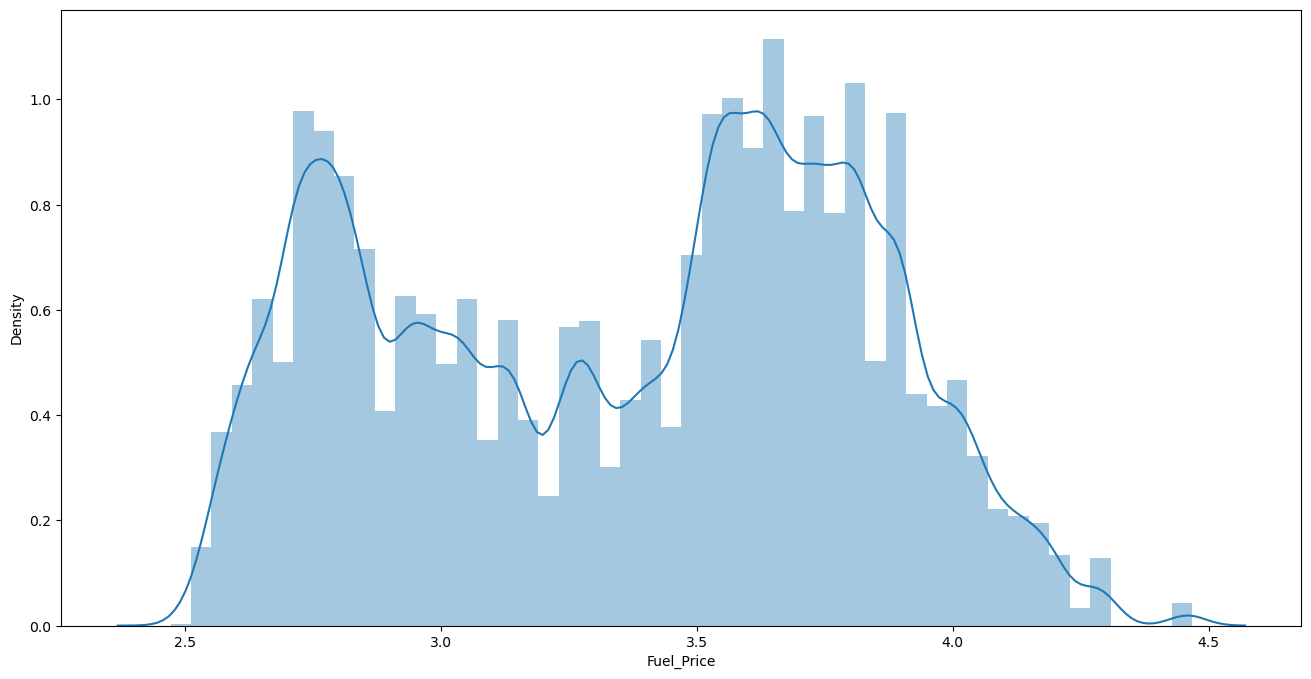

In [34]:
plt.figure(figsize= (16,8))
sns.distplot(df['Fuel_Price'])
plt.show()

## CPI

In [35]:
df['CPI'][:10]

0    211.096358
1    211.242170
2    211.289143
3    211.319643
4    211.350143
5    211.380643
6    211.215635
7    211.018042
8    210.820450
9    210.622857
Name: CPI, dtype: float64

C:\Users\DINESH KUMAR\AppData\Local\Temp\ipykernel_7568\4065861963.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CPI'],color='y')


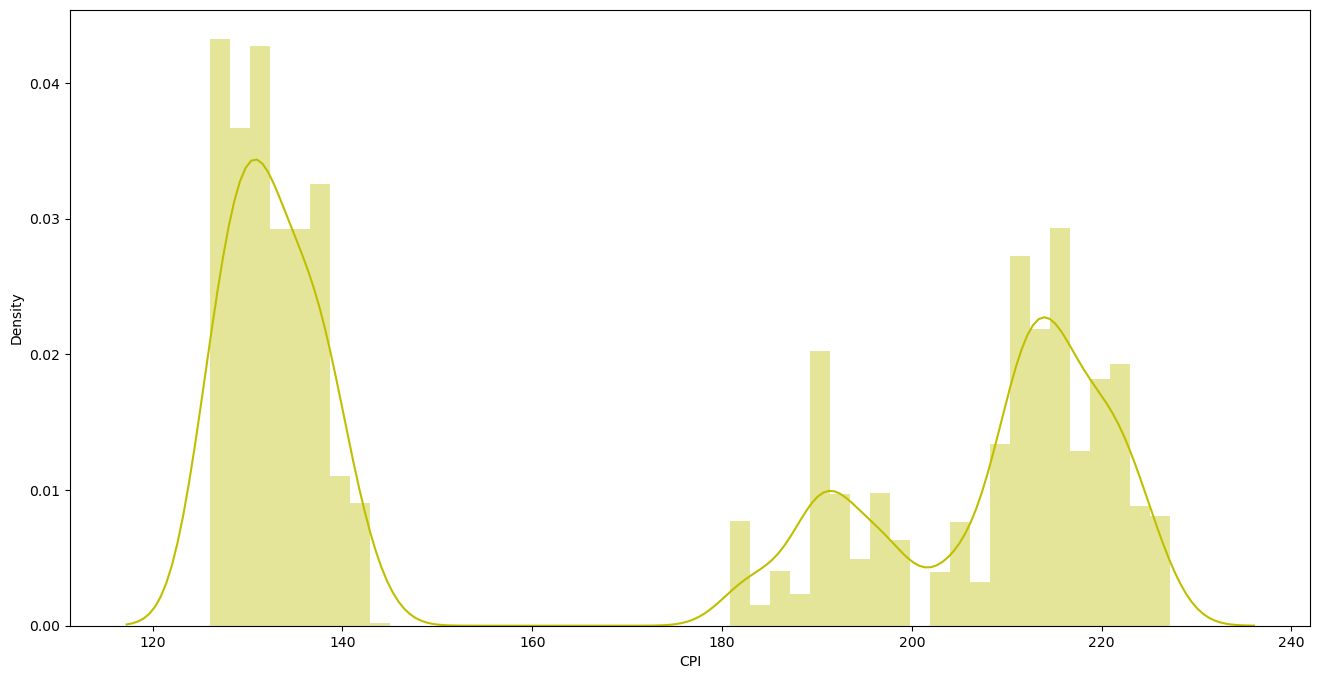

In [36]:
plt.figure(figsize= (16,8))
sns.distplot(df['CPI'],color='y')
plt.show()

## unemployment

In [37]:
df['Unemployment'][:10]

0    8.106
1    8.106
2    8.106
3    8.106
4    8.106
5    8.106
6    8.106
7    8.106
8    7.808
9    7.808
Name: Unemployment, dtype: float64

C:\Users\DINESH KUMAR\AppData\Local\Temp\ipykernel_7568\3532109437.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Unemployment'],color='r')


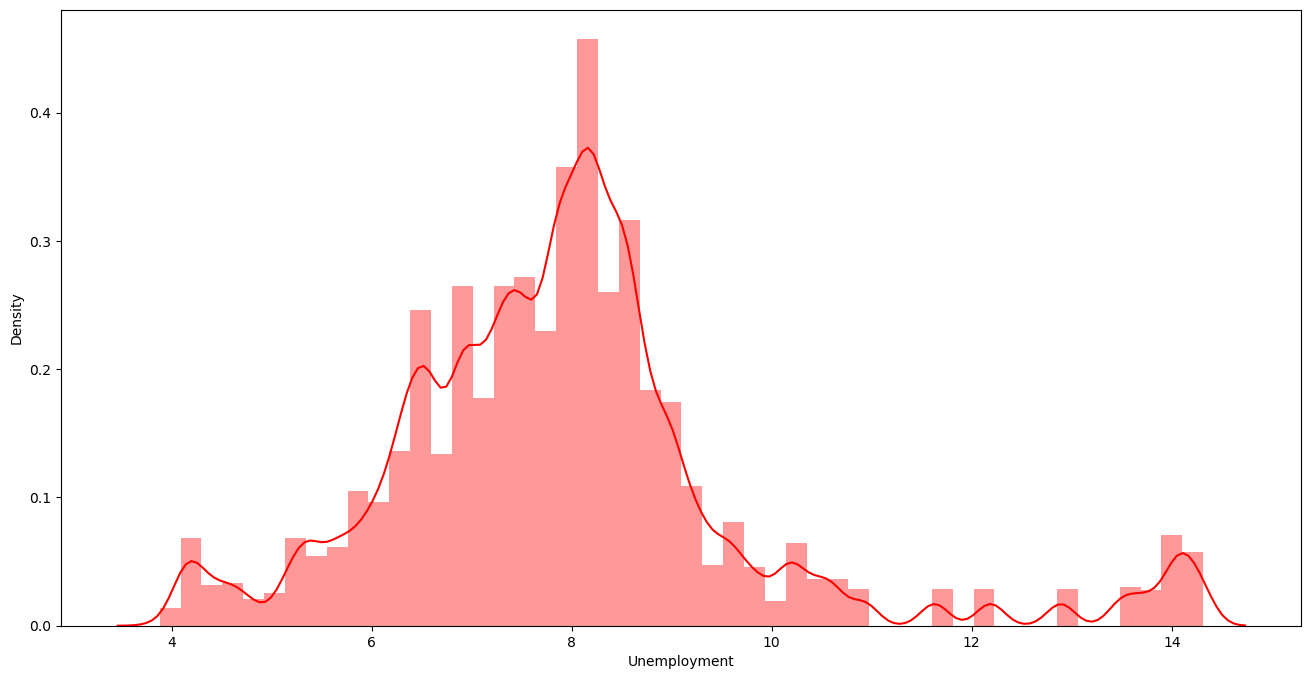

In [38]:
plt.figure(figsize= (16,8))
sns.distplot(df['Unemployment'],color='r')
plt.show()

## Type

In [39]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [40]:
df['Type'].value_counts(normalize = True)

A    0.511132
B    0.387824
C    0.101044
Name: Type, dtype: float64

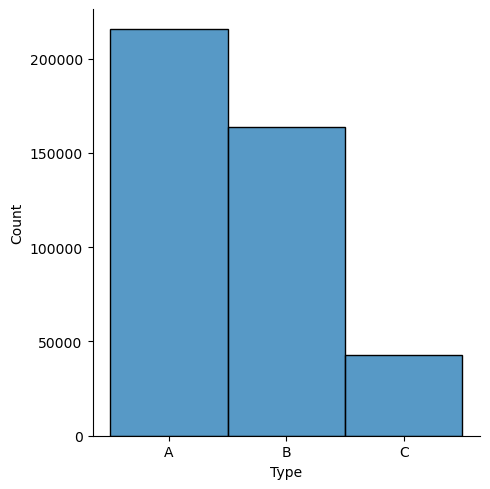

In [43]:
sns.displot(df['Type'])
plt.show()

## size

In [44]:
df['Size'][:10]

0    151315
1    151315
2    151315
3    151315
4    151315
5    151315
6    151315
7    151315
8    151315
9    151315
Name: Size, dtype: int64

C:\Users\DINESH KUMAR\AppData\Local\Temp\ipykernel_7568\1749323188.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Size'])


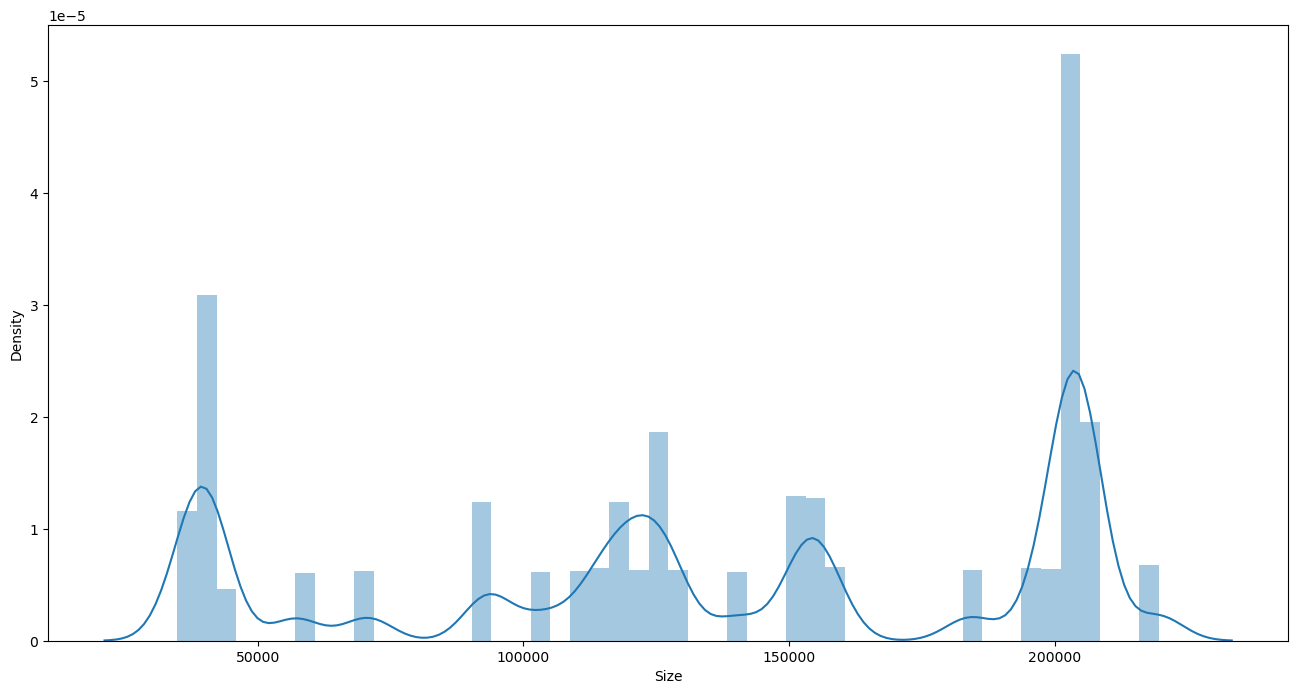

In [45]:
plt.figure(figsize= (16,8))
sns.distplot(df['Size'])
plt.show()

# Expoort the dataset

In [46]:
df.to_csv('walmart_new.csv',index = False)

In [3]:
df = pd.read_csv(r'walmart_new.csv')
df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315


In [2]:
#df.drop(['Unnamed: 0','Unnamed: 0.1'],inplace=True,axis=1)

In [4]:
df.shape

(421570, 16)

In [5]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

## correlation

In [50]:
#checking which variable is correlated weekly sales
corr_mat = df.corr()
corr_df = corr_mat['Weekly_Sales'].sort_values(ascending = False)
corr_df

C:\Users\DINESH KUMAR\AppData\Local\Temp\ipykernel_7568\536559109.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown2       0.024130
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

<Axes: >

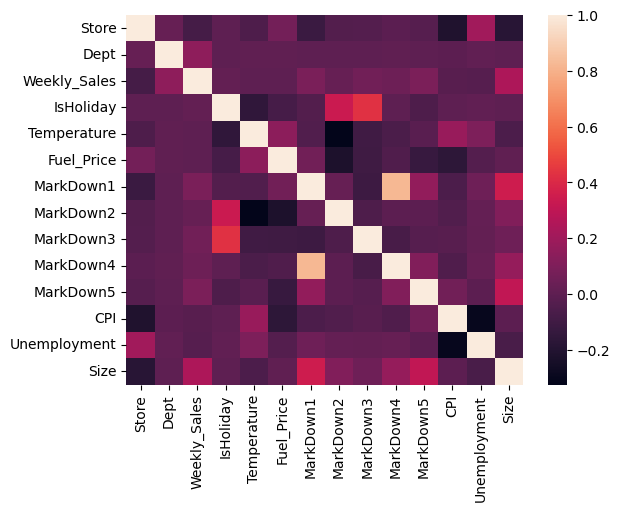

In [51]:
sns.heatmap(data=corr_mat)

## IsHoliday

In [6]:
df.IsHoliday

0         False
1          True
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: IsHoliday, Length: 421570, dtype: bool

In [7]:
bool(0)

False

In [8]:
bool(1)

True

In [9]:
def convert_holiday(x):
    if x == True:
        return 1
    if x == False:
        return 0

In [10]:
df['IsHoliday'] = df['IsHoliday'].apply(convert_holiday)

In [11]:
#here we are converting True = 1 and False  = 0
df['IsHoliday'][:4]

0    0
1    1
2    0
3    0
Name: IsHoliday, dtype: int64

## Type

In [12]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [13]:
type_df = pd.get_dummies(df['Type'],drop_first = True, prefix = 'Type')
type_df.head(3)

,Type_B,Type_C
0,0,0
1,0,0
2,0,0


In [14]:
df = pd.concat([df,type_df], axis = 1)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Type_B,Type_C
0,1,1,05/02/2010,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,0,0
1,1,1,12/02/2010,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,0,0
2,1,1,19/02/2010,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,0,0
3,1,1,26/02/2010,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,0,0
4,1,1,05/03/2010,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,0,0


In [15]:
df.Type_B

0         0
1         0
2         0
3         0
4         0
         ..
421565    1
421566    1
421567    1
421568    1
421569    1
Name: Type_B, Length: 421570, dtype: uint8

In [16]:
df.drop('Type',axis = 1, inplace = True)

In [17]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C'],
      dtype='object')

## Handling Dates

In [18]:
df.Date.dtype

dtype('O')

In [19]:
date = pd.to_datetime(df['Date'])
date[:10]

C:\Users\DINESH KUMAR\AppData\Local\Temp\ipykernel_11616\1141531736.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date = pd.to_datetime(df['Date'])


0   2010-05-02
1   2010-12-02
2   2010-02-19
3   2010-02-26
4   2010-05-03
5   2010-12-03
6   2010-03-19
7   2010-03-26
8   2010-02-04
9   2010-09-04
Name: Date, dtype: datetime64[ns]

In [20]:
date.dt.month[:5]

0     5
1    12
2     2
3     2
4     5
Name: Date, dtype: int64

In [21]:
date.dt.year[:5]

0    2010
1    2010
2    2010
3    2010
4    2010
Name: Date, dtype: int64

In [22]:
date.dt.day[:5]

0     2
1     2
2    19
3    26
4     3
Name: Date, dtype: int64

In [23]:
# adding month variable to our dataset
df['month'] = date.dt.month

In [24]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'month'],
      dtype='object')

In [25]:
df.drop('Date',axis = 1, inplace = True)

In [26]:
df.head(2)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_B,Type_C,month
0,1,1,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,0,0,5
1,1,1,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,151315,0,0,12


In [27]:
df.shape

(421570, 17)

## Handling Null Values

In [28]:
df.isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Size                 0
Type_B               0
Type_C               0
month                0
dtype: int64

In [29]:
df.fillna(value=0, inplace = True)

In [30]:
df.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
Type_B          0
Type_C          0
month           0
dtype: int64

In [31]:
#checking which variable is correlated weekly sales
corr_mat = df.corr()
corr_df = corr_mat['Weekly_Sales'].sort_values(ascending = False)
corr_df

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
month           0.024944
MarkDown2       0.020716
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Type_C         -0.095388
Type_B         -0.131219
Name: Weekly_Sales, dtype: float64

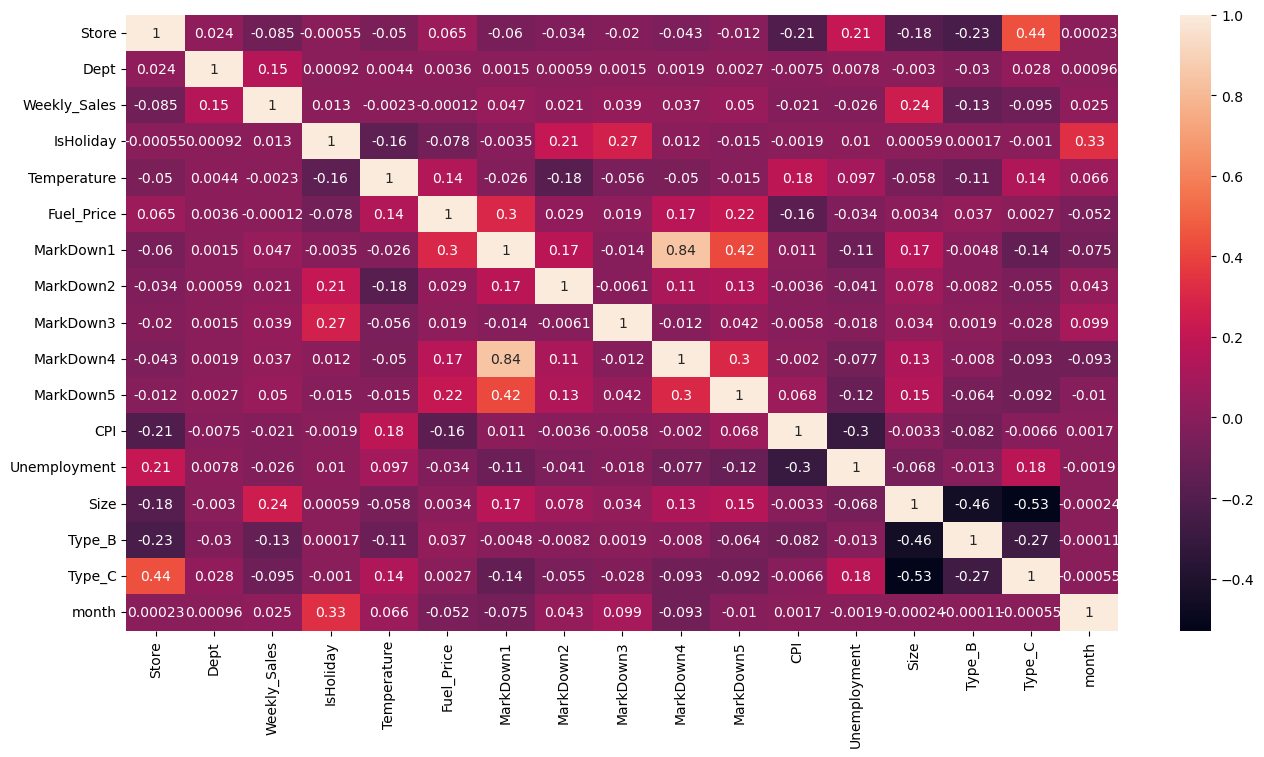

In [34]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [35]:
len(df.columns)

17

In [36]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'month'],
      dtype='object')

## here iam dropping unnecessary columns


In [37]:
df.drop(['CPI','Unemployment','Fuel_Price'],axis= 1, inplace= True)

In [38]:
len(df.columns)

14

dropping Target varible(weeklysales) from training data

In [39]:
X = df.drop('Weekly_Sales', axis = 1).values

In [40]:
X.shape

(421570, 13)

In [41]:
y = df['Weekly_Sales'].values

In [42]:
y.shape

(421570,)

## split the data

In [43]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 100)

In [44]:
X_train.shape

(337256, 13)

In [45]:
y_train.shape

(337256,)

In [46]:
X_test.shape

(84314, 13)

## Linear Regression  Model

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
reg = LinearRegression()

In [49]:
reg.fit(X_train,y_train)

LinearRegression()

In [50]:
y_predictions = reg.predict(X_test)
y_predictions

array([25465.49720663, 19302.76915255, 15783.81733695, ...,
       15745.50558445, 18095.48878821, 16068.7129302 ])

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

- MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data

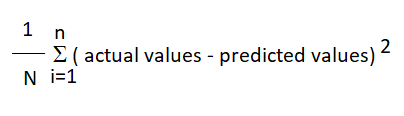

In [54]:
#mse
mse = mean_squared_error(y_test,y_predictions)
mse

465298564.77169186

- RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model

In [55]:
#rmse
np.sqrt(mse)

<IPython.core.display.Javascript object>

21570.780346841693

# Finding best model

In [52]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [58]:
def model_regression(X,y,algorithm):
    for i in algorithm:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
        model=i().fit(X_train,y_train)
        
        ytrain_pred=model.predict(X_train)
        ytest_pred=model.predict(X_test)
        
        training = r2_score(y_train,ytrain_pred)

        testing = r2_score(y_test,ytest_pred)

        data = {'Algorithm':i.__name__, 'Training R2 Score':training,'Testing R2 Score':testing}

        print(data)


In [59]:
model_regression(X,y,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,XGBRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 0.9999902695163074, 'Testing R2 Score': 0.8929472712260724}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 0.9999939922407338, 'Testing R2 Score': 0.938395401668112}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9929008609976583, 'Testing R2 Score': 0.9432873716357897}
{'Algorithm': 'AdaBoostRegressor', 'Training R2 Score': 0.16456867250772456, 'Testing R2 Score': 0.13367415040761}
{'Algorithm': 'GradientBoostingRegressor', 'Training R2 Score': 0.7426972939525016, 'Testing R2 Score': 0.7307080465938817}
{'Algorithm': 'XGBRegressor', 'Training R2 Score': 0.9322552515463931, 'Testing R2 Score': 0.9285164166275814}


## XGB Regressor

In [60]:
import xgboost as xgb

In [61]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.

In [62]:
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

C:\Users\DINESH KUMAR\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [19:59:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [63]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 20773.528631


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

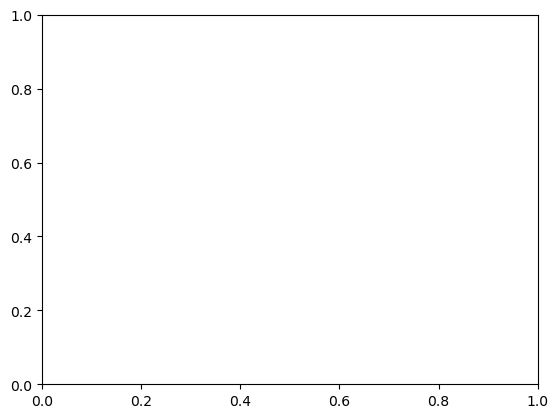

In [67]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [300, 30]
plt.show()

In [66]:
!pip install graphviz

     -------------------------------------- 47.0/47.0 kB 391.5 kB/s eta 0:00:00


In [68]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,4231.56,18603.914062
1,780.00,16189.015625
2,3871.92,15949.834961
3,2521.31,10871.467773
4,110.58,14916.095703
...,...,...
84309,600.27,19480.039062
84310,5900.52,10469.428711
84311,1854.55,13448.856445
84312,21929.30,17945.195312


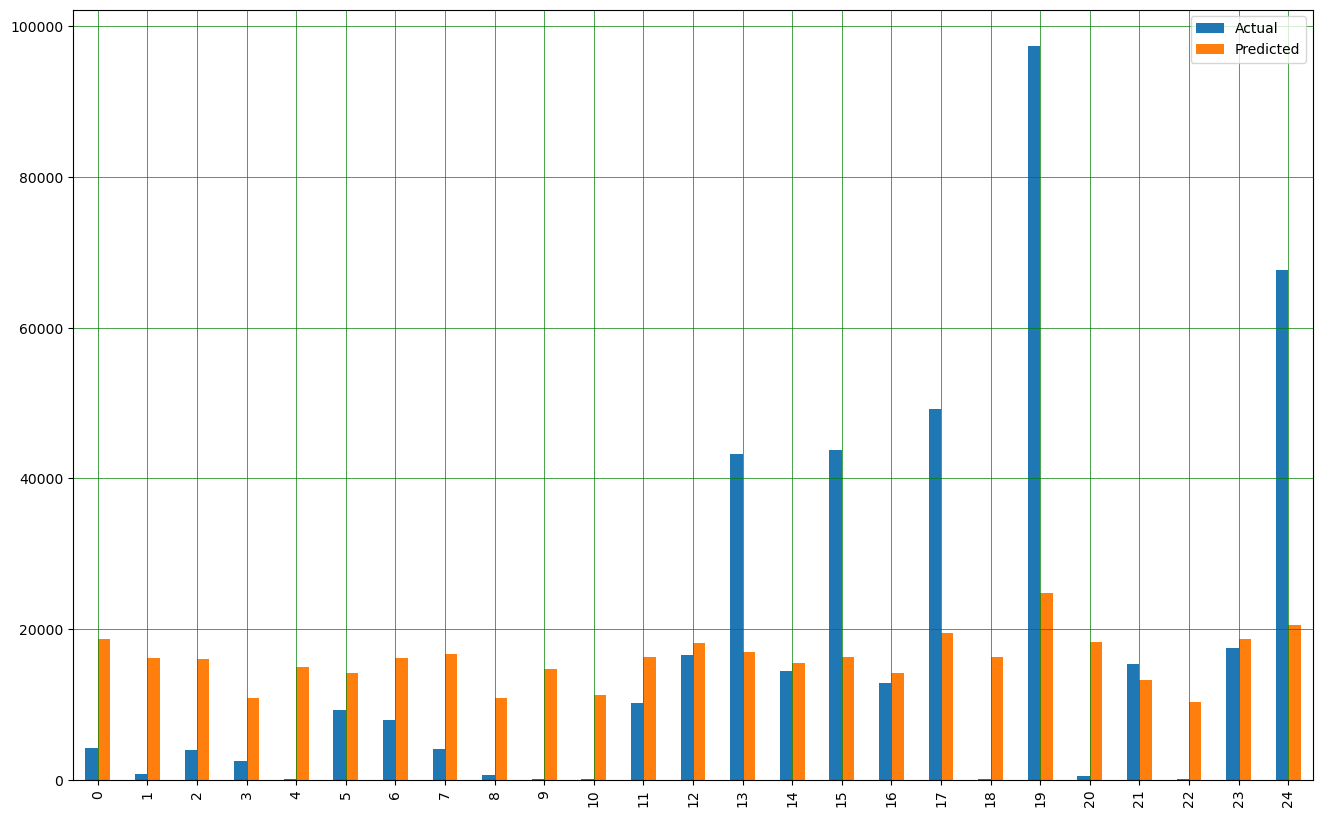

In [69]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [70]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13726.542010994619
Mean Squared Error: 431539491.7781926
Root Mean Squared Error: 20773.528630884848


## SGD

“Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function."

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
cv_score = cross_val_score(reg,X_train,y_train, n_jobs = 4, cv = 5, scoring = 'neg_mean_squared_error')

In [73]:
np.sqrt(-(cv_score))

array([21350.6631615 , 21290.04524093, 22097.06020643, 21990.75228811,
       21810.2045005 ])

In [74]:
from sklearn.linear_model import SGDRegressor

In [75]:
sgd = SGDRegressor()

In [76]:
sgd.fit(X_train, y_train)

SGDRegressor()

In [77]:
y_pred = sgd.predict(X_test)

In [78]:
sgd_error = mean_squared_error(y_test, y_pred)

In [79]:
sgd_error

5.588024838772126e+34

In [80]:
np.sqrt(sgd_error)

2.3639003445094986e+17

## Test

using separate test data

In [113]:
test = pd.read_csv("C:\\Users\\DINESH KUMAR\\Downloads\\walmart data\\test.csv")
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [114]:
df.columns

Index(['Actual', 'Predicted'], dtype='object')

In [115]:
features = pd.read_csv("C:\\Users\\DINESH KUMAR\\Downloads\\Features_data_set.csv")
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [116]:
stores = pd.read_csv("C:\\Users\\DINESH KUMAR\\Downloads\\stores_data_set.csv")
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [117]:
test = test.merge(stores, how = 'left').merge(features, how = 'left')
test.head(3)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2012-11-09,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2012-11-16,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
test.shape

(115064, 15)

In [119]:
#remove unnecessary features
test.drop(['CPI','Unemployment','Fuel_Price'], axis = 1, inplace = True)

In [120]:
test.shape

(115064, 12)

In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Store        115064 non-null  int64  
 1   Dept         115064 non-null  int64  
 2   Date         115064 non-null  object 
 3   IsHoliday    115064 non-null  bool   
 4   Type         115064 non-null  object 
 5   Size         115064 non-null  int64  
 6   Temperature  0 non-null       float64
 7   MarkDown1    0 non-null       float64
 8   MarkDown2    0 non-null       float64
 9   MarkDown3    0 non-null       float64
 10  MarkDown4    0 non-null       float64
 11  MarkDown5    0 non-null       float64
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 10.6+ MB


In [123]:
test.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature    115064
MarkDown1      115064
MarkDown2      115064
MarkDown3      115064
MarkDown4      115064
MarkDown5      115064
dtype: int64

In [124]:
test.fillna(value = 0, inplace = True)

In [125]:
test.isna().sum()


Store          0
Dept           0
Date           0
IsHoliday      0
Type           0
Size           0
Temperature    0
MarkDown1      0
MarkDown2      0
MarkDown3      0
MarkDown4      0
MarkDown5      0
dtype: int64

In [126]:
date = pd.to_datetime(test['Date'])

In [127]:
test['month'] = date.dt.month

In [128]:
dummy = pd.get_dummies(test['Type'], drop_first= True, prefix = 'Type')
dummy

,Type_B,Type_C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
115059,1,0
115060,1,0
115061,1,0
115062,1,0


In [129]:
test = pd.concat([test, dummy], axis = 1)
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,month,Type_B,Type_C
0,1,1,2012-11-02,False,A,151315,0.0,0.0,0.0,0.0,0.0,0.0,11,0,0
1,1,1,2012-11-09,False,A,151315,0.0,0.0,0.0,0.0,0.0,0.0,11,0,0
2,1,1,2012-11-16,False,A,151315,0.0,0.0,0.0,0.0,0.0,0.0,11,0,0
3,1,1,2012-11-23,True,A,151315,0.0,0.0,0.0,0.0,0.0,0.0,11,0,0
4,1,1,2012-11-30,False,A,151315,0.0,0.0,0.0,0.0,0.0,0.0,11,0,0


In [130]:
test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       'month', 'Type_B', 'Type_C'],
      dtype='object')

In [131]:
test.drop(['Type','Date'],axis=1,inplace = True)


In [132]:
test.columns

Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'month', 'Type_B',
       'Type_C'],
      dtype='object')

In [133]:
len(test.columns)

13

In [134]:
len(df.columns)

2

In [135]:
test_pred = sgd.predict(test)

C:\Users\DINESH KUMAR\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [136]:
test_pred.shape

(115064,)

In [137]:
test.shape

(115064, 13)

## Making submission csv

ID = 1-1-2012-11-02 [store_dept_date]

weekly_sales = our predictions

In [139]:
data = pd.read_csv("C:\\Users\\DINESH KUMAR\\Downloads\\walmart data\\test.csv")
data.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [150]:
Id = data['Store'].astype(str)+'_'+data['Dept'].astype(str)+'_'+data['Date'].astype(str)

In [151]:
Id[:2]

0    1_1_2012-11-02
1    1_1_2012-11-09
dtype: object

In [154]:
data = {'Id':Id, 'Weekly_Sales':test_pred}

In [161]:
submission = pd.DataFrame(data = data)
submission.head(3)

,Id,Weekly_Sales
0,1_1_2012-11-02,1.434120e+18
1,1_1_2012-11-09,1.434120e+18
2,1_1_2012-11-16,1.434120e+18


In [165]:
submission['Weekly_Sales']=submission['Weekly_Sales'].apply(lambda x : Decimal(x))

In [166]:
submission.head(3)

,Id,Weekly_Sales
0,1_1_2012-11-02,1434120370272332800
1,1_1_2012-11-09,1434120370272332800
2,1_1_2012-11-16,1434120370272332800


In [164]:
submission.to_csv('output.csv',index = False)